# **Transfer Learning**
---

Técnica donde un modelo desarrolado para una tarea particular se reutiliza como un punto de partida para un modelo en una segunda tarea realcionada. En lugar de entrtenar un modelo desde cero, se toma un modelo preentrenado e un tarea similar y su ajusta para la nueva tarea.


**Fine Tunning**: Es un form a específica de Transfer Learning. COnsiste en tomar un modelo preentrenado y ajustar sus parámetros mediante un entrenamiento adicional en una nueva tarea específica. Normalmente se descongela una parte de las capas del modelo preentrenado y se reentrenan con un conjunto de datos más pequeño y específico para la nueva tarea.

## **Diferencias clave entre Transfer Learning y FIne Tuning**

1. Nivel de ajuste
  * Transfer Learning implica simplemente reutilizar el modelo preentrenado como extractor de características y entrenar solo las capas finales (clasificador) en la neuva tarea.
  * Nvolucra entrennar algunas (o todas) las capas del modelo preentrenado ajustando más profundamente el modelo a la nueva tarea.
2. Reentrenamiento de capas
  * Transfer Learning generalmente solo entre las últimas capas (cabeza del modelo) desde cero, mientras que las capas anteriores permanecen congeladas.
  * En el Fine Tuning de las capas anteriores también se descongelan y se reentrenan junto con las nuevas capas, permitiendo un ajuste más fino del modelo.
3. Uso de datos.
  * Transfer LEarning utiliza el conocimeinto de la tarea original sin modificar significativamente el modelo preentrenado.
  * Fine Tuning requiere datos adicionales específicos de la neuva tarea para ajustar y afinar el modelo.
4. Profundidad de entrenamiento.
  * Es menos intensivo en términos de cómputo y tiempo, ya que solo se entrenan algunas capas finales.
  * Es más intensivo ya que implica el reentrenamiento de más capas, lo que puede requerir más recursos y tiempo.
5. Objetivo.
  * Busca aplicar el conocimeinto general del modelo preentrenado a la nueva tarea sin grandes modificaciones.
  * Busca ajustar el modelo preentrenado específicamente par amejorar su rendimeinto en la nueva tarea.

**En resumen**
* **Transfer Learning** y es una forma más simple. Emplea al modelo como extractor de características y entrena solo la capa de salida (clasificador).
* **Fine Tuning** implica ajustar los pesos del modelo preentrenado en su totalidad o paricalmente, además de entrenar la capa de salida. Se descongelan algunas de las capas superiores del modelo para permitir su ajuste con los neuvos datos.



# **Tensorflow Hub**
---
En Tensorflow Hub se empleartoda una variedad de modelos preentrenados:
1. **Modelos de clasificación `(.../classification)`**
  * Diseñados para realizar tareas de clasiicación completas. INcluyen tanto las capas convolucionales como las capas densas finales que realizan las clasificación.
  * Transfer Learning
    * Congelar y añadir capas
    * Fine tuning: Descongelar algunas capas y entrenarlas junto con las nuevas capas añadidas.
2. **Modelos de extracción de características `(.../feature extractor)`**
  * Diseñados para extraer características aignificativas de las imágenes. Incluyen solo las capas convoluciones y terminan antes de las capas de clasificación.
  * Transfer Learning
    * Añadir capas de clasificación.
3. **Modelos de detección de objetos**
4. **Modelos de segmentacón**
5. **Modelos de Texto (text embeddings, text classification)**
6. **Modelos de Audio ("audio feature extraction", "audio classification")**


In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
mobilenet = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow1/035-96-classification/2"

In [3]:
IMAGE_SHAPE = (96,96)
classifier = tf.keras.Sequential([
    hub.KerasLayer(mobilenet, input_shape=IMAGE_SHAPE+(3,))
])

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/4895721242_89014e723c_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4933823300_39fd4420b6.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/1297092593_e573c0a3d6.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3838274225_36010c6254_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5955500463_6c08cb199e.jpg')]

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4900231976_f8ced2b42a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8667101118_87ea757b15.jpg'),
 PosixPath('datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'),
 PosixPath('datasets/flower_photos/roses/3630246240_4fee9a33db.jpg'),
 PosixPath('datasets/flower_photos/roses/4998708839_c53ee536a8_n.jpg')]

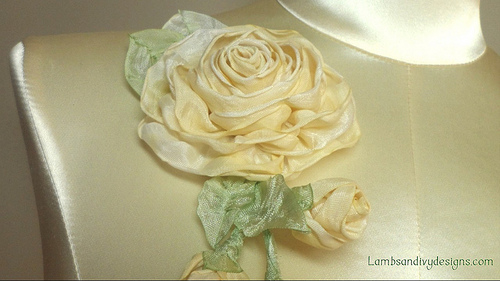

In [10]:
Image.open(str(roses[1]))

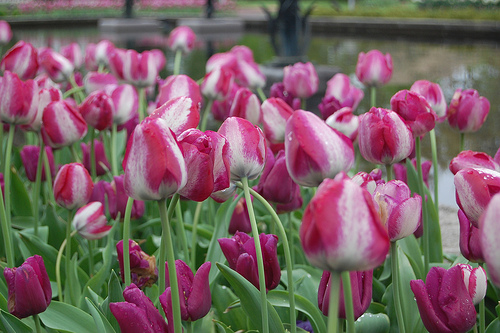

In [11]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(tulips[0])

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4900231976_f8ced2b42a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8667101118_87ea757b15.jpg'),
 PosixPath('datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'),
 PosixPath('datasets/flower_photos/roses/3630246240_4fee9a33db.jpg'),
 PosixPath('datasets/flower_photos/roses/4998708839_c53ee536a8_n.jpg')]

In [15]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4900231976_f8ced2b42a_n.jpg'

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [17]:
img.shape

(240, 320, 3)

In [18]:
cv2.resize(img,(96,96)).shape

(96, 96, 3)

In [27]:
X,y = [],[]

In [28]:
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(96,96))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [31]:
X_train_scaled = X_train/255
X_test_scaled  = X_test/255

In [32]:
X[0].shape

(96, 96, 3)

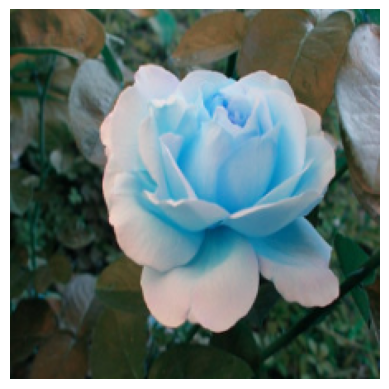

In [72]:
plt.axis('off')
plt.imshow(X[0])

In [48]:
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([905, 905, 905])

In [55]:
import requests

url = "https://raw.githubusercontent.com/leferrad/tensorflow-mobilenet/master/imagenet/labels.txt"
response = requests.get(url)

# Obtener el contenido del archivo
file_content = response.text

# Especificar el nombre del archivo local donde se guardará
local_file_path = "labels.txt"

# Guardar el contenido en un archivo local
with open(local_file_path, "w") as file:
    file.write(file_content)

In [56]:
img_labels = []

with open("labels.txt", "r") as f:
  img_labels = f.read().splitlines()
img_labels[:5]

['background',
 'tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri']

In [60]:
img_labels[predicted[2]]

'window screen'

## **Transfer Learning** - **Modelos de clasificación `(.../classification)`**
  * Diseñados para realizar tareas de clasiicación completas. INcluyen tanto las capas convolucionales como las capas densas finales que realizan las clasificación.
  * Transfer Learning
    * Congelar y añadir capas
    * Fine tuning: Descongelar algunas capas y entrenarlas junto con las nuevas capas añadidas.

In [48]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# URL del modelo MobileNet preentrenado en TensorFlow Hub
mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_96/classification/4"

# Definir el modelo utilizando el modelo MobileNet desde TensorFlow Hub
mobilenet = hub.KerasLayer(mobilenet_url, input_shape=(96, 96, 3), trainable=False)

# Construir el modelo de clasificación
model = tf.keras.Sequential([
    mobilenet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')  # Ajusta el número de clases según tu problema
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 flatten_3 (Flatten)         (None, 1001)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               513024    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 4055854 (15.47 MB)
Trainable params: 515589 (1.97 MB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [49]:
model.fit(X_train_scaled, y_train,
          epochs=3,
          batch_size=16)

Epoch 1/3
172/172 [==============================] - 21s 93ms/step - loss: 0.8762 - accuracy: 0.7413
Epoch 2/3
172/172 [==============================] - 23s 133ms/step - loss: 0.2411 - accuracy: 0.9164
Epoch 3/3
172/172 [==============================] - 27s 160ms/step - loss: 0.1198 - accuracy: 0.9622


In [50]:
predictions = model.predict(X_test_scaled)

29/29 [==============================] - 5s 160ms/step


In [51]:
predictions

array([[3.6452290e-02, 6.9804570e-05, 6.7998255e-05, 1.9613106e-02,
        9.4379675e-01],
       [1.3258722e-06, 7.1242505e-07, 9.9624145e-01, 3.7549345e-03,
        1.5916323e-06],
       [2.7782751e-05, 3.3354215e-07, 8.6111646e-07, 5.9321777e-05,
        9.9991161e-01],
       ...,
       [9.5826863e-07, 2.5635663e-05, 2.9578665e-03, 9.9561834e-01,
        1.3971439e-03],
       [5.1905657e-04, 1.7818982e-06, 3.0048497e-03, 9.9630827e-01,
        1.6601455e-04],
       [2.1207891e-04, 6.7145720e-02, 9.2726445e-01, 4.9376814e-03,
        4.4019060e-04]], dtype=float32)

In [52]:
preds = [np.argmax(pred) for pred in predictions]

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(preds, y_test)

0.8115468409586056

## **Modelos de extracción de características `(.../feature extractor)`**
  * Diseñados para extraer características aignificativas de las imágenes. Incluyen solo las capas convoluciones y terminan antes de las capas de clasificación.
  * Transfer Learning
    * Añadir capas de clasificación.

In [54]:
import tensorflow as tf
import tensorflow_hub as hub

feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_96/feature_vector/4"
feature_extractor = hub.KerasLayer(feature_extractor_url, input_shape=(96, 96, 3), trainable=False)

model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [55]:
model.fit(X_train_scaled, y_train,
          epochs=3,
          batch_size=16)

Epoch 1/3
172/172 [==============================] - 18s 84ms/step - loss: 0.7201 - accuracy: 0.7562
Epoch 2/3
172/172 [==============================] - 15s 85ms/step - loss: 0.3129 - accuracy: 0.8805
Epoch 3/3
172/172 [==============================] - 15s 85ms/step - loss: 0.1477 - accuracy: 0.9480


In [56]:
predictions = model.predict(X_test_scaled)
preds = [np.argmax(pred) for pred in predictions]
accuracy_score(preds, y_test)

29/29 [==============================] - 6s 163ms/step


0.8420479302832244

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# URL del modelo de extracción de características de audio
audio_model_url = "https://tfhub.dev/google/yamnet/1"
audio_model = hub.KerasLayer(audio_model_url, input_shape=(16000,), dtype=tf.float32, trainable=False)

model = tf.keras.Sequential([
    audio_model,
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')  # Ajusta el número de clases según tu problema
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

audio = tf.random.uniform([16000])  # Ejemplo de datos de audio
predictions = model.predict(tf.expand_dims(audio, axis=0))
